IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

OUHENIA Ghiles - YEHYA Jad

<b>Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.</b>
Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

<b>Les groupes de plus de 2 personnes ne sont pas autorisés.</b>

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2022


<font size="+1" color="RED"><b>Date de rendu : lundi 9 mai, 19h au plus tard</b></font>
    
(<b>attention! le site Moodle ferme à 19h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...)


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données Agribalise qui sont des données ouvertes dont la documentation peut être consultée ici : https://doc.agribalyse.fr/documentation/acces-donnees

Très important : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- Donnees_Agribalyse/
                  -- detail_ingredient.csv
                  -- detail_etape.csv
                  -- synthese.csv

Dans le notebook, le chargement des fichiers de données considèrera donc cette arborescence.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive du répertoire iads/
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: Les fichiers de données ne doivent pas être inclus dans votre archive !

## Soutenance des projets
La soutenance sera organisée après la semaine d'examens de mai entre le 17 et le 25 mai (la date sera précisé sur le forum du Moodle).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




# Problèmatique d'apprentissage non supervisé

In [2]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de Clustering
from iads import Clustering as clust

import seaborn as sns
from tqdm import tqdm
# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Chargement des données

In [3]:
first_data = pd.read_csv('Donnees_Agribalyse/detail_etape.csv')
data_etape = pd.read_csv("Donnees_Agribalyse/detail_etape.csv")
# Affiche les dimensions de la matrice
print("Nombre de lignes : ",np.shape(data_etape)[0], "\nNombre de colones : ", np.shape(data_etape)[1])
data_etape.head()

Nombre de lignes :  2480 
Nombre de colones :  102


,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,DQR,Nom et code,Score unique EF (mPt / kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Transformation,...,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,DQR - P,DQR - TiR,DQR - GR,DQR - TeR
0,12112,12112,lait et produits laitiers,fromages,Abondance,"Abondance cheese, from cow's milk",2.24,Abondance (12112),0.470679,0.046274,...,2.855985,0.552672,0.108718,0.985193,0.148203,0.042714,2.84,2.05,1.18,2.87
1,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",2.46,"Abricot au sirop léger, appertisé, égoutté (13...",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
2,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",2.46,"Abricot au sirop léger, appertisé, non égoutté...",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.25,3.62,1.96,2.01
3,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",2.46,"Abricot au sirop, appertisé, égoutté (13714)",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
4,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",2.44,"Abricot au sirop, appertisé, non égoutté (13715)",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.21,3.65,1.92,1.97


D'après les recommendations de Agribalyse, nous avons décidé de ne pas prendre en compte les exemples avec un DQR > 3 car la qualité des données n'est pas assez fiable.

In [4]:
# Suppression des lignes avec DQR > 3
data_etape = data_etape[data_etape['DQR'] <= 3]


In [5]:
print(first_data.dtypes[first_data.dtypes == "object"])

Code AGB                      object
Groupe d'aliment              object
Sous-groupe d'aliment         object
Nom du Produit en Français    object
LCI Name                      object
Nom et code                   object
dtype: object


In [6]:
# On convertit toutes les colonnes non numériques en variables numériques
for i in (data_etape.dtypes[data_etape.dtypes == "object"]).index:
    data_etape[i].replace(np.unique(data_etape[i]), range(0,len(np.unique(data_etape[i]))), inplace=True)

data_etape


,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,DQR,Nom et code,Score unique EF (mPt / kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Transformation,...,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,DQR - P,DQR - TiR,DQR - GR,DQR - TeR
0,125,12112,6,19,0,0,2.24,1,0.470679,0.046274,...,2.855985,0.552672,0.108718,0.985193,0.148203,0.042714,2.84,2.05,1.18,2.87
1,270,13712,4,20,2,18,2.46,3,0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
2,271,13713,4,20,1,19,2.46,2,0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.25,3.62,1.96,2.01
3,272,13714,4,20,4,20,2.46,5,0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
4,273,13715,4,20,3,21,2.44,4,0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.21,3.65,1.92,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,377,19580,6,36,1664,1676,2.50,1664,0.388324,0.057529,...,3.216641,0.509986,0.069836,0.804968,0.148203,0.042714,2.65,1.87,3.89,1.61
2476,379,19593,6,36,1667,1670,2.04,1667,0.168020,0.031331,...,0.655855,0.254659,0.069836,0.666737,0.148203,0.042714,2.47,1.87,1.79,2.02
2477,380,19594,6,36,1668,1671,2.48,1668,0.168020,0.031331,...,0.655855,0.254659,0.069836,0.666737,0.148203,0.042714,3.35,1.87,1.79,2.91
2478,381,19598,6,36,1670,1672,1.90,1670,0.180150,0.039865,...,1.058970,0.871713,0.069836,0.667499,0.148203,0.042714,2.47,1.87,1.79,1.48


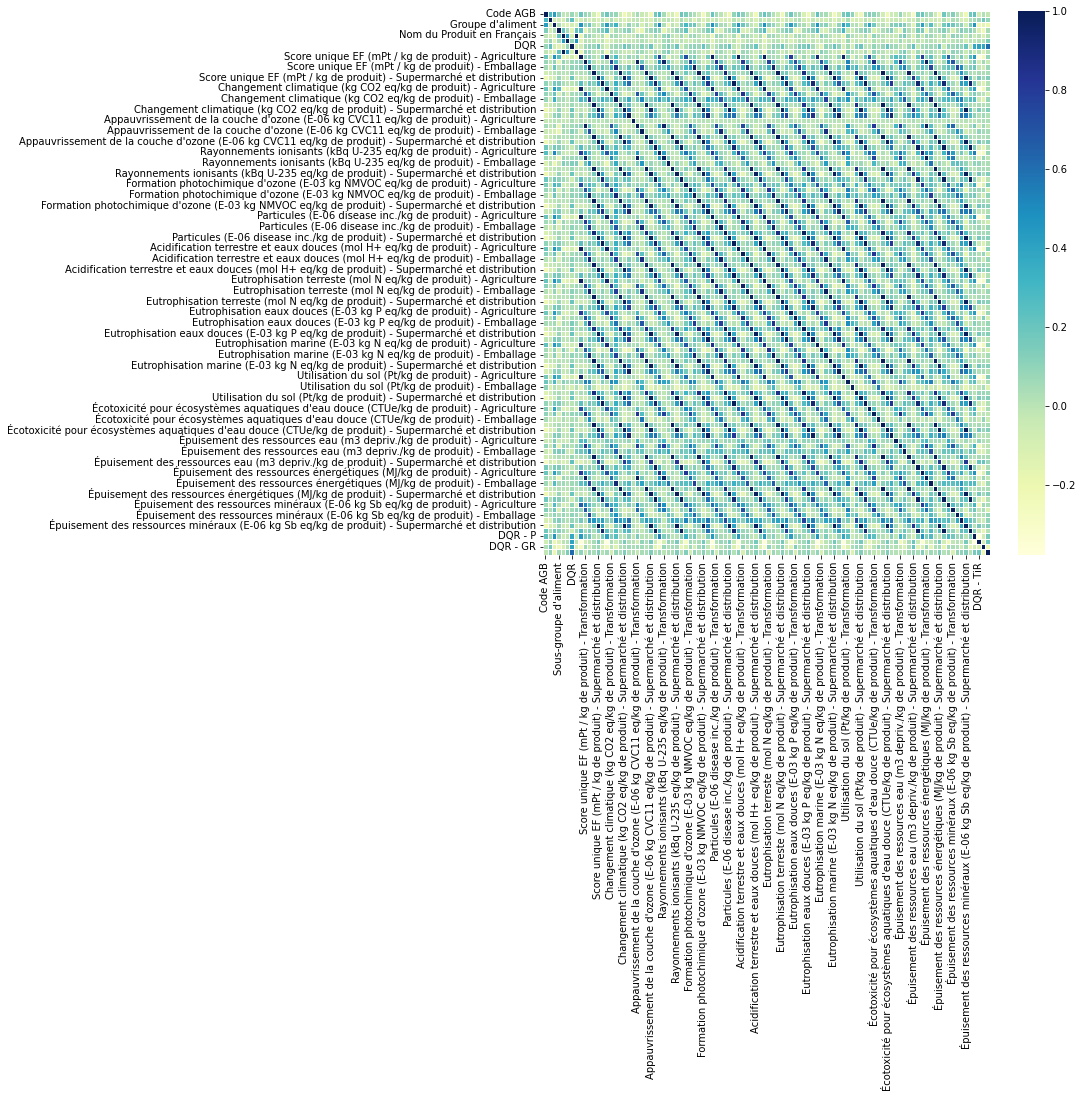

In [8]:
corr = data_etape.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap="YlGnBu", annot=False, linewidths=0.5)
plt.show()

On remarque que les attributs
- Code CIQUAL
- Code AGB
- Nom du Produit en français
- Nom et Code
- ...
(Tous les attributs de type 'Object' ne sont pas corrélés)
On décide donc de les enlever du dataset pour réduire les dimensions et améliorer la précision des résultats.

In [9]:
for i in (first_data.dtypes[first_data.dtypes == "object"]).index:
    if i in data_etape.columns:
        data_etape.drop(columns=i, inplace=True)
if "Ciqual AGB" in data_etape.columns:
    data_etape.drop(columns="Ciqual AGB", inplace=True)
if "Ciqual code" in data_etape.columns:
    data_etape.drop(columns="Ciqual code", inplace=True)
if "Code CIQUAL" in data_etape.columns:
    data_etape.drop(columns="Code CIQUAL", inplace=True)
if 'DQR' in data_etape.columns:
    data_etape.drop(['DQR'], axis=1, inplace=True)
data_etape

,Score unique EF (mPt / kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Transformation,Score unique EF (mPt / kg de produit) - Emballage,Score unique EF (mPt / kg de produit) - Transport,Score unique EF (mPt / kg de produit) - Supermarché et distribution,Score unique EF (mPt / kg de produit) - Consommation,Changement climatique (kg CO2 eq/kg de produit) - Agriculture,Changement climatique (kg CO2 eq/kg de produit) - Transformation,Changement climatique (kg CO2 eq/kg de produit) - Emballage,Changement climatique (kg CO2 eq/kg de produit) - Transport,...,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,DQR - P,DQR - TiR,DQR - GR,DQR - TeR
0,0.470679,0.046274,0.019721,0.020615,0.008827,0.002429,5.327912,0.369609,0.266627,0.265165,...,2.855985,0.552672,0.108718,0.985193,0.148203,0.042714,2.84,2.05,1.18,2.87
1,0.061297,0.075215,0.034667,0.017515,0.016504,0.010169,0.188315,0.166137,0.350156,0.225336,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
2,0.038249,0.046934,0.021632,0.010929,0.010298,0.000000,0.117508,0.103670,0.218498,0.140610,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.25,3.62,1.96,2.01
3,0.061297,0.075215,0.034667,0.017515,0.016504,0.010169,0.188315,0.166137,0.350156,0.225336,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
4,0.038249,0.046934,0.021632,0.010929,0.010298,0.000000,0.117508,0.103670,0.218498,0.140610,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.21,3.65,1.92,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,0.388324,0.057529,0.015478,0.020409,0.008827,0.002429,5.258945,0.403051,0.205859,0.242402,...,3.216641,0.509986,0.069836,0.804968,0.148203,0.042714,2.65,1.87,3.89,1.61
2476,0.168020,0.031331,0.015478,0.013728,0.008827,0.002429,1.881607,0.140324,0.205859,0.180033,...,0.655855,0.254659,0.069836,0.666737,0.148203,0.042714,2.47,1.87,1.79,2.02
2477,0.168020,0.031331,0.015478,0.013728,0.008827,0.002429,1.881607,0.140324,0.205859,0.180033,...,0.655855,0.254659,0.069836,0.666737,0.148203,0.042714,3.35,1.87,1.79,2.91
2478,0.180150,0.039865,0.015478,0.013754,0.008827,0.002429,2.039357,0.195433,0.205859,0.180292,...,1.058970,0.871713,0.069836,0.667499,0.148203,0.042714,2.47,1.87,1.79,1.48


In [10]:
# On normalise les données
data_etape = clust.normalisation(data_etape)
data_etape

,Score unique EF (mPt / kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Transformation,Score unique EF (mPt / kg de produit) - Emballage,Score unique EF (mPt / kg de produit) - Transport,Score unique EF (mPt / kg de produit) - Supermarché et distribution,Score unique EF (mPt / kg de produit) - Consommation,Changement climatique (kg CO2 eq/kg de produit) - Agriculture,Changement climatique (kg CO2 eq/kg de produit) - Transformation,Changement climatique (kg CO2 eq/kg de produit) - Emballage,Changement climatique (kg CO2 eq/kg de produit) - Transport,...,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,DQR - P,DQR - TiR,DQR - GR,DQR - TeR
0,0.078718,0.026706,0.089115,0.019587,0.137573,0.017075,0.089979,0.075921,0.129410,0.018012,...,0.046016,0.032386,0.002824,0.068696,0.138819,0.035778,0.396648,0.237705,0.034301,0.483696
1,0.010252,0.043409,0.156653,0.016609,0.257822,0.071472,0.007055,0.034126,0.169952,0.015282,...,0.020653,0.028010,0.005723,0.047266,0.246984,0.012922,0.231844,0.666667,0.240106,0.250000
2,0.006397,0.027087,0.097751,0.010282,0.160619,0.000000,0.005913,0.021295,0.106050,0.009473,...,0.012888,0.017478,0.003571,0.029362,0.153862,0.000000,0.231844,0.666667,0.240106,0.250000
3,0.010252,0.043409,0.156653,0.016609,0.257822,0.071472,0.007055,0.034126,0.169952,0.015282,...,0.020653,0.028010,0.005723,0.047266,0.246984,0.012922,0.231844,0.666667,0.240106,0.250000
4,0.006397,0.027087,0.097751,0.010282,0.160619,0.000000,0.005913,0.021295,0.106050,0.009473,...,0.012888,0.017478,0.003571,0.029362,0.153862,0.000000,0.220670,0.674863,0.229551,0.239130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,0.064945,0.033202,0.069942,0.019390,0.137573,0.017075,0.088866,0.082791,0.099916,0.016452,...,0.051827,0.029885,0.001814,0.056065,0.138819,0.035778,0.343575,0.188525,0.749340,0.141304
1680,0.028100,0.018082,0.069942,0.012971,0.137573,0.017075,0.034375,0.028824,0.099916,0.012176,...,0.010567,0.014923,0.001814,0.046377,0.138819,0.035778,0.293296,0.188525,0.195251,0.252717
1681,0.028100,0.018082,0.069942,0.012971,0.137573,0.017075,0.034375,0.028824,0.099916,0.012176,...,0.010567,0.014923,0.001814,0.046377,0.138819,0.035778,0.539106,0.188525,0.195251,0.494565
1682,0.030129,0.023008,0.069942,0.012996,0.137573,0.017075,0.036920,0.040144,0.099916,0.012194,...,0.017062,0.051081,0.001814,0.046431,0.138819,0.035778,0.293296,0.188525,0.195251,0.105978


In [11]:
# appliquer la méthode de clustering
print(first_data.columns)
attr = "Groupe d\'aliment"
print (len(np.unique(first_data[attr])) )

centres, affect = clust.kmoyennes(2, data_etape, 0.05, 100)

Index(['Code AGB', 'Code CIQUAL', 'Groupe d'aliment', 'Sous-groupe d'aliment',
       'Nom du Produit en Français', 'LCI Name', 'DQR', 'Nom et code',
       'Score unique EF (mPt / kg de produit) - Agriculture',
       'Score unique EF (mPt / kg de produit) - Transformation',
       ...
       'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture',
       'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation',
       'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage',
       'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport',
       'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution',
       'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation',
       'DQR - P', 'DQR - TiR', 'DQR - GR', 'DQR - TeR'],
      dtype='object', length=102)
11
1482.1797923977492
iteration 1  Inertie 1462.7301850892386 Différenc

In [12]:
print("Nombre de centres : ", len(centres))
print("Nombre d'affectations : ", len(affect))
# Affiche le nombre d'affectations par cluster
for i in range(len(centres)):
    print(i," : ", len(affect[i]))

Nombre de centres :  2
Nombre d'affectations :  2
0  :  385
1  :  1299


On peut voir que les clusters sont bien divisés. on va essayer de trouver quels attributs sont les plus discriminants pour le clustering.

In [13]:
# On crée un dataframe avec les centres
centres_df = pd.DataFrame(centres)
centres_df.columns = data_etape.columns
centres_df


,Score unique EF (mPt / kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Transformation,Score unique EF (mPt / kg de produit) - Emballage,Score unique EF (mPt / kg de produit) - Transport,Score unique EF (mPt / kg de produit) - Supermarché et distribution,Score unique EF (mPt / kg de produit) - Consommation,Changement climatique (kg CO2 eq/kg de produit) - Agriculture,Changement climatique (kg CO2 eq/kg de produit) - Transformation,Changement climatique (kg CO2 eq/kg de produit) - Emballage,Changement climatique (kg CO2 eq/kg de produit) - Transport,...,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,DQR - P,DQR - TiR,DQR - GR,DQR - TeR
0,0.273129,0.048064,0.121124,0.020562,0.194749,0.188613,0.274613,0.084548,0.172618,0.018924,...,0.130351,0.075139,0.008104,0.069930,0.194432,0.355369,0.501567,0.229324,0.226248,0.430703
1,0.053273,0.030408,0.091799,0.017979,0.162361,0.025282,0.046671,0.059297,0.110828,0.016139,...,0.058346,0.042912,0.012119,0.050276,0.159810,0.037614,0.356882,0.343955,0.329468,0.431423


In [14]:
# on calcule la différence entre les centroide pour voir quel attributs sont les plus discriminants et les trier par ordre décroissant

centres_df_sorted = (centres_df.diff().abs().iloc[-1])
centres_df_sorted.sort_values(ascending=False, inplace=True)



In [15]:
# On va eliminer les attributs qui sont trop proches (plus de 5%)
centres_df_sorted.drop(centres_df_sorted.index[centres_df_sorted.values < 0.2], inplace=True)
centres_df_sorted

Rayonnements ionisants (kBq U-235 eq/kg de produit) - Consommation                      0.401488
Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation         0.317754
Épuisement des ressources énergétiques (MJ/kg de produit) - Consommation                0.298540
Rayonnements ionisants (kBq U-235 eq/kg de produit) - Agriculture                       0.290549
Épuisement des ressources eau (m3 depriv./kg de produit) - Consommation                 0.269625
Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit) - Consommation    0.246202
Eutrophisation marine (E-03 kg N eq/kg de produit) - Agriculture                        0.236255
Changement climatique (kg CO2 eq/kg de produit) - Agriculture                           0.227943
Score unique EF (mPt / kg de produit) - Agriculture                                     0.219856
Acidification terrestre et eaux douces (mol H+ eq/kg de produit) - Agriculture          0.212169
Eutrophisation terreste (mol N

In [16]:
pertinents = centres_df[centres_df_sorted.index]
pertinents

,Rayonnements ionisants (kBq U-235 eq/kg de produit) - Consommation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,Épuisement des ressources énergétiques (MJ/kg de produit) - Consommation,Rayonnements ionisants (kBq U-235 eq/kg de produit) - Agriculture,Épuisement des ressources eau (m3 depriv./kg de produit) - Consommation,Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit) - Consommation,Eutrophisation marine (E-03 kg N eq/kg de produit) - Agriculture,Changement climatique (kg CO2 eq/kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Agriculture,Acidification terrestre et eaux douces (mol H+ eq/kg de produit) - Agriculture,Eutrophisation terreste (mol N eq/kg de produit) - Agriculture,Particules (E-06 disease inc./kg de produit) - Agriculture
0,0.446913,0.355369,0.333688,0.377083,0.307621,0.276362,0.299528,0.274613,0.273129,0.252266,0.24912,0.252779
1,0.045425,0.037614,0.035148,0.086534,0.037996,0.030160,0.063273,0.046671,0.053273,0.040097,0.03718,0.041370


In [17]:
# Retourne l'index du maximum de la premiere colonne de pertinents
cluster_polluant = pertinents.idxmax(axis=0)
cluster_polluant = cluster_polluant.iloc[0]

12


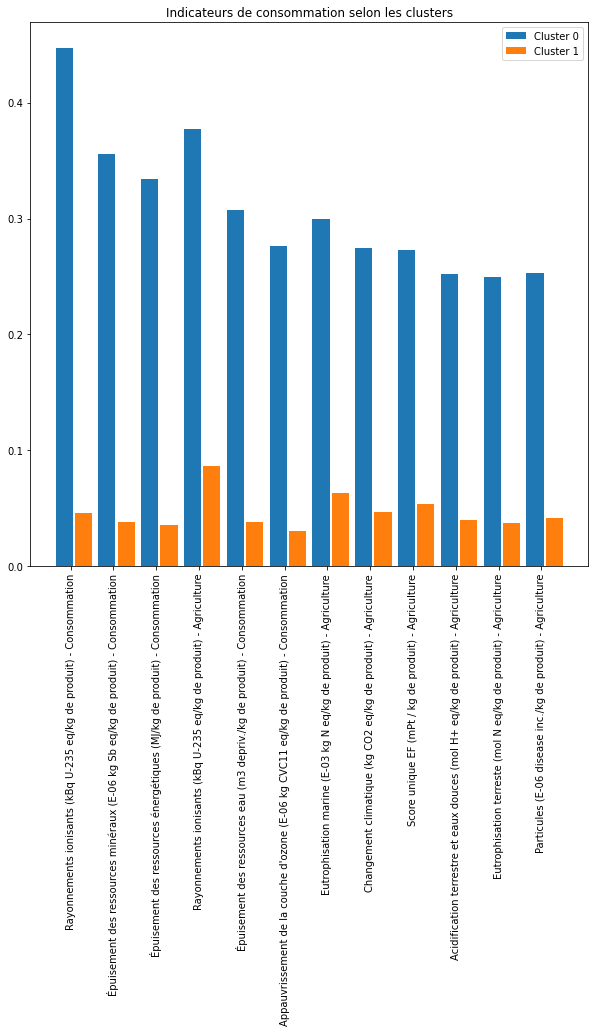

In [19]:
# Recuperer toutes les colonnes de la forme '.* - Consommation *' dans le dataframe
#cons_cols = [i for i in pertinents.columns if re.match(".* - Consommation.*", i)]

nom_attr = [i for i in pertinents.columns ]
print(len(nom_attr))
x = np.array([len(pertinents)*i for i in range(len(nom_attr))])
c = list()
plt.figure(figsize=(10, 10))

for i in range(len(pertinents)):
    c.append(pertinents.iloc[i])
    dep = (-1)**(i+1) * (i+1)*(0.3)
    plt.bar(x+dep, c[i], label="Cluster "+str(i))

plt.xticks(x, nom_attr, rotation=90)
plt.title("Indicateurs de consommation selon les clusters")
plt.legend()
plt.show()

On remarque que le cluster 2 possède une consommation supérieures dans toutes les catégories. On peut donc bien conclure quant à la présence d'un cluster composés de produits "polluants" et avec un impact fort sur l'environnement et un autre cluster composé de produits peu "polluant" et donc un impact plus faible.

In [21]:
# on  va afficher ne nombre d'occurence par attribut

t = pd.DataFrame(np.unique(first_data[attr], return_counts=True))
t.columns = np.unique(first_data[attr])
t = t.iloc[1]
t

aides culinaires et ingrédients divers         158
aliments infantiles                             33
boissons                                       219
entrées et plats composés                      281
fruits, légumes, légumineuses et oléagineux    423
glaces et sorbets                               25
lait et produits laitiers                      221
matières grasses                                56
produits céréaliers                            375
produits sucrés                                 53
viandes, œufs, poissons                        636
Name: 1, dtype: object

In [22]:
# On crée un np.array avec les attributs avec le nombre d'occurence s'il existe 0 sinon
print(first_data.columns)

d = {i: [] for i in np.unique(first_data[attr])}
dic_unique_clust = {i:
                        {
                            np.unique(first_data.iloc[affect[i]][attr], return_counts=True)[0][j]:

                            np.unique(first_data.iloc[affect[i]][attr], return_counts=True)[1][j]
                        for j in range(len(np.unique(first_data.iloc[affect[i]][attr], return_counts=True)[0]))
                        }
                    for i in range(len(affect))
                    }

for i in d.keys():
    for j in range(len(affect)):
        if i in dic_unique_clust[j].keys():
            d[i].append(dic_unique_clust[j][i])
        else:
            d[i].append(0)

Index(['Code AGB', 'Code CIQUAL', 'Groupe d'aliment', 'Sous-groupe d'aliment',
       'Nom du Produit en Français', 'LCI Name', 'DQR', 'Nom et code',
       'Score unique EF (mPt / kg de produit) - Agriculture',
       'Score unique EF (mPt / kg de produit) - Transformation',
       ...
       'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture',
       'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation',
       'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage',
       'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport',
       'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution',
       'Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation',
       'DQR - P', 'DQR - TiR', 'DQR - GR', 'DQR - TeR'],
      dtype='object', length=102)


In [23]:
pd.DataFrame(d)


,aides culinaires et ingrédients divers,aliments infantiles,boissons,entrées et plats composés,"fruits, légumes, légumineuses et oléagineux",glaces et sorbets,lait et produits laitiers,matières grasses,produits céréaliers,produits sucrés,"viandes, œufs, poissons"
0,10,4,30,28,56,1,41,9,95,5,106
1,54,14,160,93,235,19,127,46,220,44,287


In [24]:
d2 = pd.DataFrame(d)

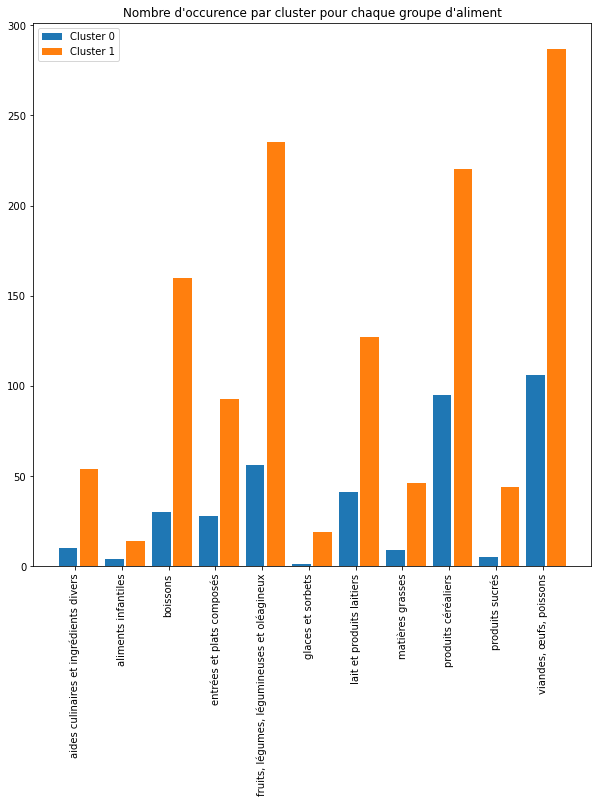

In [26]:
nom_attr = list(d2.columns)
x = np.array([len(d2)*i for i in range(len(nom_attr))])
c = list()
plt.figure(figsize=(10, 10))
#dep = np.linspace(-0.3, 0.3, len(d2))

for i in range(len(d2)):
    c.append(d2.iloc[i])
    dep = (-1)**(i+1) * (i+1)*(0.3)
    plt.bar(x+dep, c[i], label="Cluster "+str(i))

plt.xticks(x, nom_attr, rotation=90)
plt.title("Nombre d'occurence par cluster pour chaque groupe d'aliment")
plt.legend()
plt.show()

On remarque que le cluster 1

In [27]:
ingredients = pd.read_csv("./Donnees_Agribalyse/detail_ingredient.csv")
# Affiche la taille de la base de données
print(len(ingredients))


5671


In [28]:
ingredients.head()

,Ciqual AGB,Ciqual code,Nom Français,Groupe d'aliment,Sous-groupe d'aliment,LCI Name,Ingredients,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jaune d'œuf,0.039743,0.164754,0.014089,...,0.046616,0.006761,0.029441,0.052027,1.329230,16.984964,7.404112,0.337769,1.475548,0.251356
1,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Ail,0.004417,0.011444,0.002512,...,0.000781,0.000105,0.000328,0.004760,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
2,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jus de citron,0.019375,0.061230,0.007842,...,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
3,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Huile d'olive,0.445364,1.161825,0.136467,...,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.100950,9.374618,12.100965,4.424012
4,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Autres étapes,0.080761,0.571172,0.126768,...,0.024611,0.002630,0.008368,0.090374,1.295442,4.529954,11.433712,0.759522,22.626111,1.278583


In [29]:
(first_data['Code CIQUAL'] == 18220).unique()

array([False,  True])

In [30]:
ingredients["Ciqual AGB"].value_counts()

25919    15
25904    15
25131    13
25218    13
25219    13
         ..
18900     2
13109     2
18220     2
25928     1
25901     1
Name: Ciqual AGB, Length: 1038, dtype: int64

In [31]:
etapes = pd.read_csv("./Donnees_Agribalyse/detail_etape.csv")
# Affiche la taille de la base de données
print(len(etapes))
# affiche le nombre de valeurs uniques de code AGB et CIQUAL
print(etapes["Code AGB"].value_counts())
print(etapes["Code CIQUAL"].value_counts())

2480
12112    1
23422    1
31014    1
8245     1
8240     1
        ..
76056    1
76058    1
76057    1
76059    1
19599    1
Name: Code AGB, Length: 2480, dtype: int64
13014    3
20047    3
20061    2
13025    2
4103     1
        ..
76024    1
76055    1
76056    1
76058    1
19599    1
Name: Code CIQUAL, Length: 2474, dtype: int64


In [32]:
codes_ciqual_polluants = first_data.iloc[affect[cluster_polluant]]["Code CIQUAL"]
# Lignes qui ne sont pas des produits polluants
codes_ciqual_non_polluants = first_data.iloc[affect[1-cluster_polluant]]["Code CIQUAL"]

In [33]:
ingredients_polluant = ingredients[ingredients['Ciqual AGB'].isin(codes_ciqual_polluants)]["Ingredients"].unique()
ingredients_non_polluant = ingredients[ingredients['Ciqual AGB'].isin(codes_ciqual_non_polluants)]["Ingredients"].unique()

In [34]:
ing = {"ingredients_polluant" : ingredients_polluant, "ingredients_non_polluant" : ingredients_non_polluant}
# différence entre les deux
only_pollue = set(ingredients_polluant) - set(ingredients_non_polluant)
never_pollue =  set(ingredients_non_polluant) - set(ingredients_polluant)
# intersection entre les deux
inter = set(ingredients_polluant) & set(ingredients_non_polluant)
pollution = {"only_pollue" : list(only_pollue), "never_pollue" : list(never_pollue), "inter" : list(inter)}
pollution

{'only_pollue': ['Huile de colza',
  'Thon',
  'Pain pour hamburger/hot-dog',
  'Abats de poulet',
  'Piment',
  'Choufleur',
  'Patate douce',
  'Thym',
  'Comté',
  'Huil de lin',
  'Anchois commun',
  'Origan',
  'Romarin',
  'Herbes de Provence'],
 'never_pollue': ['Cassonade',
  'Graisse de porc',
  'Saucisses sèches',
  'Boisson à base de soja',
  'Sauce au curry',
  'Riz non décortiqué',
  'Escargot',
  'Millet',
  'Chou blanc',
  'Choucroute',
  'Pomme',
  'Fromage à pâte dure',
  'Basilic',
  'Fromage',
  'Grenade',
  'Jus de fruits mélangé',
  'Bière',
  'Thé',
  'Blé dur',
  'Farine de sarrasin',
  'Ciboulette ou oignon de printemps',
  'Haricot rouge',
  'Jambon cuit',
  'Moutarde',
  'citron',
  'Poire',
  'Graines de tournesol',
  'Fromage fondu',
  'Cerises',
  'Graines de pavot',
  'Coquille Saint-Jacques',
  'Lentilles',
  'Fromage de Cheddar',
  'Pêche',
  'Avocat',
  'Chou vert',
  'Noix',
  'Crevette',
  'Concentré de tomates 30° Brix',
  'Sirop',
  'Mélange de chic

liste des ingrédients polluants

In [37]:
# Les sous groupe avec les ingredients polluants
sous_groupe_polluant = ingredients[ingredients['Ingredients'].isin(pollution["only_pollue"])]['Sous-groupe d\'aliment'].unique()
sous_groupe_non_polluant = ingredients[ingredients['Ingredients'].isin(pollution["never_pollue"])]['Sous-groupe d\'aliment'].unique()
# différence entre les deux
sous_grp = {"groupe_polluant" : set(groupe_polluant) - set(groupe_non_polluant) , "groupe_non_polluant" : set(groupe_non_polluant) - set(groupe_polluant)}
sous_grp

{'groupe_polluant': {'herbes',
  'huiles et graisses végétales',
  'pommes de terre et autres tubercules'},
 'groupe_non_polluant': {'aides culinaires',
  'autres produits à base de viande',
  'boisson alcoolisées',
  'boissons sans alcool',
  'chocolats et produits à base de chocolat',
  'confitures et assimilés',
  'céréales de petit-déjeuner et biscuits',
  'farines et pâtes à tarte',
  'feuilletées et autres entrées',
  'fromages',
  'fruits',
  'gâteaux et pâtisseries',
  'ingrédients divers',
  'légumes',
  'pains et viennoiseries',
  'produits laitiers frais et assimilés',
  'pâtes, riz et céréales'}}

## Conclusion
Au cours de nos analyses, nous avons d'abord traité les données en supprimant les attributs qui n'étaient pas corrélés dans la base de données ainsi que les données qui n'étaient pas assez fiables d'après les recommendations Agribalyse.

Nous avons ensuite pû appliquer un algorithme de Kmeans pour séparer nos données en 2 clusters. Après quoi nous avons déterminer quels étaient les attributs qui séparaient le mieux les 2 clusters et nous avons vu que c'était les indicateurs d'impact sur l'environnement pour la consommation et l'agriculture.
Nous avons pu à ce moment généraliser et dire que l'algorithme de Kmeans avait retourné un cluster d'éléments polluants et un cluster d'éléments peu polluants puisque tous ces indicateurs allaient dans le même sens.

A partir de là, nous avons essayer de savoir quels étaient ces éléments. Pour cela, nous avons cherché tous les ingrédients dont le code CIQUAL était dans chaque cluster. On peut retrouver les ingrédients qui sont tout le temps dans le cluster polluants et ceux qui ne le sont jamais dans le dictionnaire pollution.

Enfin, dans cette optique de généralisation, nous avons décidé de voir quels étalent les sous-groupes d'aliments qui présentent le plus grand impact environnemental. Voilà ce que nous avons trouvé :

On remarque que les sous-groupes d'aliments : __herbes__, __huiles et graisses végétales__ et __pommes de terre et autres tubercules__ ont le plus grand impact environnemental puisqu'ils ne font partie que du cluster qui présente des indicateurs de pollution plus élevés.